# Feature Selection

## Why feature selection?

Feature selection, or *variable selection*, is an often used technique in machine learning. It is a process of selecting subset of highly relevant data to benefit modelling in many ways. Such as,

- Reduce the complexity, that is, improve the efficiency of training [1].

- Improve the prediction accuracy [1,2].




## Example from Iris data


### Data Description

https://scikit-learn.org/1.4/auto_examples/datasets/plot_iris_dataset.html

This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150 rows and 4 columns array.

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

### Load required libraries

In [2]:
# load libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

### Load data

In [3]:
# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

# Convert to binary classification: Setosa vs. Not Setosa
y_binary = (y == 0).astype(int)  # Setosa = 1, others = 0

X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Correlation matrix

In [4]:
# Compute Pearson correlation between each feature and the binary target
correlations = {}
for col in X.columns:
    corr, _ = pearsonr(X[col], y_binary)
    correlations[col] = abs(corr)

# Sort features by absolute correlation
sorted_features = sorted(correlations.items(), key=lambda x: x[1], reverse=True)
sorted_features


[('petal length (cm)', 0.9227653847036497),
 ('petal width (cm)', 0.8873436966114582),
 ('sepal length (cm)', 0.7174156686860961),
 ('sepal width (cm)', 0.6033478273490609)]

### Select top feature(s)

In [6]:

# Select top 2 features
k = 2
top_features = [feature for feature, _ in sorted_features[:k]]
top_features


['petal length (cm)', 'petal width (cm)']

### Prepare data

In [7]:
# Split data into training and test sets
X_train_all, X_test_all, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)
X_train_sel = X_train_all[top_features]
X_test_sel = X_test_all[top_features]

### Regression model

In [8]:
# Train logistic regression on all features
model_all = LogisticRegression(max_iter=200)
model_all.fit(X_train_all, y_train)
y_pred_all = model_all.predict(X_test_all)

# Train logistic regression on selected features
model_sel = LogisticRegression(max_iter=200)
model_sel.fit(X_train_sel, y_train)
y_pred_sel = model_sel.predict(X_test_sel)

### Evaluate the model

In [10]:
# Evaluate accuracy
acc_all = accuracy_score(y_test, y_pred_all)
acc_sel = accuracy_score(y_test, y_pred_sel)

print(f"Accuracy with all features: {acc_all:.4f}")
print(f"Accuracy with selected features: {acc_sel:.4f}")

Accuracy with all features: 1.0000
Accuracy with selected features: 1.0000


### Visualize the comparison

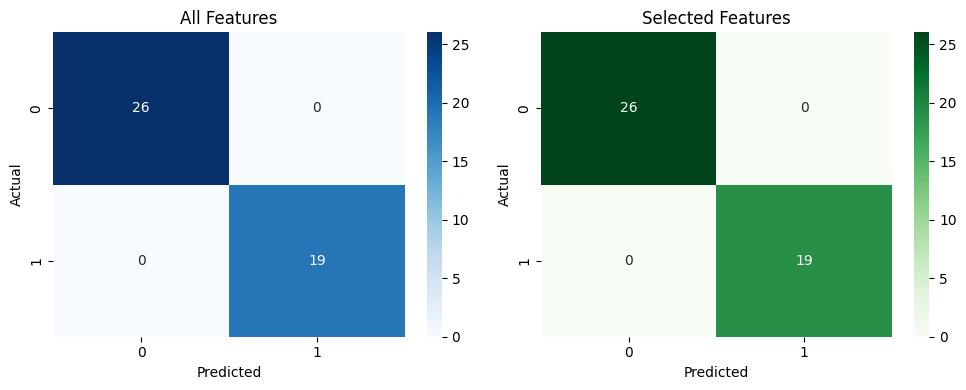

In [11]:
# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.heatmap(confusion_matrix(y_test, y_pred_all), annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title('All Features')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, y_pred_sel), annot=True, fmt='d', ax=axes[1], cmap='Greens')
axes[1].set_title('Selected Features')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


## Reference

1. Gareth James; Daniela Witten; Trevor Hastie; Robert Tibshirani (2013). "An Introduction to Statistical Learning". *Springer*. p. 204.
2. Kratsios, Anastasis; Hyndman, Cody (2021). "NEU: A Meta-Algorithm for Universal UAP-Invariant Feature Representation". *Journal of Machine Learning Research*. 22 (92): 1–51